In [48]:
import numpy as np 
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium
import webbrowser
from folium import plugins

print('Dependencies imported.')

Dependencies imported.


In [38]:
import pandas as pd

df = pd.read_csv('Neighbourhoods.csv')
df.head()

,id,Neighbourhoods,Longitude,Latitude
0,94,Wychwood (94),-79.425515,43.676919
1,100,Yonge-Eglinton (100),-79.403590,43.704689
2,97,Yonge-St.Clair (97),-79.397871,43.687859
3,27,York University Heights (27),-79.488883,43.765736
4,31,Yorkdale-Glen Park (31),-79.457108,43.714672


In [125]:
tor_map = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

incidents = folium.map.FeatureGroup()

for lat, long in zip(df['Latitude'], df['Longitude']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=7, 
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )  
tor_map.add_child(incidents)
tor_map.save("toronto_map.html")
webbrowser.open("toronto_map.html")

True

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,2014,June,20,171,Friday,13,2014.0,June,20.0,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,2014,July,2,183,Wednesday,5,2014.0,July,2.0,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,2014,July,2,183,Wednesday,20,2014.0,July,2.0,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005


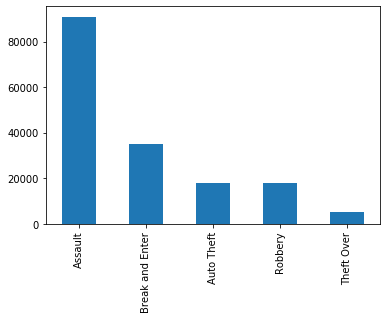

In [63]:
df_crime = pd.read_csv('MCI_2014_to_2018.csv')
df_crime['MCI'].value_counts().plot(kind='bar')

df_crime.head()

In [82]:
top_20 = df_crime.groupby('Neighbourhood')[['MCI']].count().nlargest(20, 'MCI')
top_20

,MCI
Neighbourhood,
Church-Yonge Corridor (75),6301
Waterfront Communities-The Island (77),5674
West Humber-Clairville (1),4338
Moss Park (73),3609
Bay Street Corridor (76),3564
Kensington-Chinatown (78),3263
Woburn (137),3158
York University Heights (27),3141
Downsview-Roding-CFB (26),2974


In [83]:
map_data = df_crime[['Neighbourhood', 'Lat', 'Long']].drop_duplicates('Neighbourhood').set_index('Neighbourhood')\
        .join(top_20, how='inner')
map_data

,Lat,Long,MCI
Neighbourhood,,,
Bay Street Corridor (76),43.659229,-79.385193,3564
Malvern (132),43.801727,-79.210373,2024
Clairlea-Birchmount (120),43.709972,-79.273819,2163
Moss Park (73),43.653381,-79.369148,3609
Church-Yonge Corridor (75),43.649132,-79.372192,6301
Woburn (137),43.779549,-79.232979,3158
Islington-City Centre West (14),43.654171,-79.551331,2589
Bendale (127),43.773617,-79.261131,2277
York University Heights (27),43.743652,-79.491852,3141


In [113]:
from folium.plugins import HeatMap

data = df_crime[['Lat', 'Long', 'MCI']].values.tolist()
tor_crime_map = folium.Map(location=[43.666550, -79.385261], 
				  control_scale=True, zoom_start=12)
crimes = plugins.MarkerCluster().add_to(tor_crime_map)
for lat, long, label, in zip(df_crime['Lat'], df_crime['Long'], df_crime['MCI']):
    folium.Marker(
        location=[lat, long],
        icon=None,
        popup=label,
    ).add_to(crimes)
tor_crime_map.add_child(crimes)
tor_crime_map.save('heat_crime_map.html')  
webbrowser.open('heat_crime_map.html')

True

In [116]:
df_price = pd.read_csv('wellbeing-toronto-housing.csv')
df_price.sort_values(by="Home Prices",inplace=True)
df_price.tail()

,Neighbourhood,Neighbourhood Id,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Longitude,Latitude
102,Lawrence Park South,103,1215390,290,455,-79.406039,43.717212
97,Rosedale-Moore Park,98,1265389,3170,4735,-79.379669,43.682820
39,St.Andrew-Windfields,40,1363202,955,2195,-79.379037,43.756246
100,Forest Hill South,101,1585984,1380,1990,-79.414318,43.694526
40,Bridle Path-Sunnybrook-York Mills,41,1849084,0,0,-79.378904,43.731013


In [118]:
data = df_price.tail(50)[['Latitude', 'Longitude', 'Home Prices']].values.tolist()
tor_price_map = folium.Map(location=[43.666550, -79.385261], 
				  control_scale=True, zoom_start=12)

tor_price_map.add_child(HeatMap(data, radius = 10, gradient={.2: 'blue', .55: 'lime', 1: 'red'}))

tor_price_map.save('heat_price_map.html')  
webbrowser.open('heat_price_map.html')

True

In [158]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20191225' # Foursquare API version
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [159]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb',
                  'Suburb Latitude',
                  'Suburb Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']
    return(nearby_venues)

In [160]:
table_final = pd.read_csv('toronto.csv')
table_toronto = table_final[table_final['Borough'].str.contains('Toronto')].reset_index(drop=True) # only cluster borough with 'Toronto' in name
toronto_venues = getNearbyVenues(names=table_toronto['Neighborhood'],
                                   latitudes=table_toronto['Latitude'],
                                   longitudes=table_toronto['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [163]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Suburb'] = toronto_venues['Suburb'] 
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Suburb,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [164]:
toronto_grouped = toronto_onehot.groupby('Suburb').mean().reset_index()
toronto_cluster = toronto_grouped.drop(['Suburb'],axis=1)

In [165]:
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_cluster)
# check cluster labels generated for each row in the dataframe
label = kmeans.labels_

In [166]:
toronto_cluster['Suburb']=toronto_grouped['Suburb']
toronto_cluster['label']=label
toronto_cluster.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio,Suburb,label
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.0,0.0,0.010000,0.0,0.03,0.0,0.000000,0.000000,0.0,0.000000,0.030000,0.0,0.030000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.01,0.000000,0.01,0.010000,0.000000,0.0,0.01,0.03,0.010000,0.0,0.000000,0.050000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.080000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.02,0.0,0.000000,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.01,0.0

In [167]:
toronto_NLL = toronto_venues.loc[:,['Suburb','Suburb Latitude','Suburb Longitude']].drop_duplicates().sort_values('Suburb')
toronto_NLL.shape

(38, 3)

In [169]:
toronto_merged = pd.DataFrame(toronto_cluster.loc[:,['label','Suburb']])
toronto_merged.shape

(38, 2)

In [170]:
toronto_merged = toronto_merged.join(toronto_NLL.set_index('Suburb'),on='Suburb')
toronto_merged.head()

,label,Suburb,Suburb Latitude,Suburb Longitude
0,2,"Adelaide, King, Richmond",43.650571,-79.384568
1,2,Berczy Park,43.644771,-79.373306
2,2,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191
3,2,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558
4,2,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420


In [171]:
latitude = toronto_merged['Suburb Latitude'][0]
longitude = toronto_merged['Suburb Longitude'][0]
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Suburb Latitude'], toronto_merged['Suburb Longitude'], toronto_merged['Suburb'], toronto_merged['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgCiAgICAgICAgPHNjcmlwdD4KICAgICAgICAgICAgTF9OT19UT1VDSCA9IGZhbHNlOwogICAgICAgICAgICBMX0RJU0FCTEVfM0QgPSBmYWxzZTsKICAgICAgICA8L3NjcmlwdD4KICAgIAogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuLmpzZGVsaXZyLm5ldC9ucG0vbGVhZmxldEAxLjUuMS9kaXN0L2xlYWZsZXQuanMiPjwvc2NyaXB0PgogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY29kZS5qcXVlcnkuY29tL2pxdWVyeS0xLjEyLjQubWluLmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9qcy9ib290c3RyYXAubWluLmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5qcyI+PC9zY3JpcHQ+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vY2RuLmpzZGVsaXZyLm5ldC9ucG0vbGVhZmxldEAxLjUuMS9kaXN0L2xlYWZsZXQuY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vYm9vdHN0cmFwLzMuMi4wL2Nzcy9ib290c3RyYXAubWluLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9mb250LWF3ZXNvbWUvNC42LjMvY3NzL2ZvbnQtYXdlc29tZS5taW4uY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL0xlYWZsZXQuYXdlc29tZS1tYXJrZXJzLzIuMC4yL2xlYWZsZXQuYXdlc29tZS1tYXJrZXJzLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2Nkbi5naXRoYWNrLmNvbS9weXRob24tdmlzdWFsaXphdGlvbi9mb2xpdW0vbWFzdGVyL2ZvbGl1bS90ZW1wbGF0ZXMvbGVhZmxldC5hd2Vzb21lLnJvdGF0ZS5jc3MiLz4KICAgIDxzdHlsZT5odG1sLCBib2R5IHt3aWR0aDogMTAwJTtoZWlnaHQ6IDEwMCU7bWFyZ2luOiAwO3BhZGRpbmc6IDA7fTwvc3R5bGU+CiAgICA8c3R5bGU+I21hcCB7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7Ym90dG9tOjA7cmlnaHQ6MDtsZWZ0OjA7fTwvc3R5bGU+CiAgICAKICAgICAgICAgICAgPG1ldGEgbmFtZT0idmlld3BvcnQiIGNvbnRlbnQ9IndpZHRoPWRldmljZS13aWR0aCwKICAgICAgICAgICAgICAgIGluaXRpYWwtc2NhbGU9MS4wLCBtYXhpbXVtLXNjYWxlPTEuMCwgdXNlci1zY2FsYWJsZT1ubyIgLz4KICAgICAgICAgICAgPHN0eWxlPgogICAgICAgICAgICAgICAgI21hcF8xN2U3NGQ3OGUwYzY0YTM1ODYzOWVhYjA5ODQxNjk2MSB7CiAgICAgICAgICAgICAgICAgICAgcG9zaXRpb246IHJlbGF0aXZlOwogICAgICAgICAgICAgICAgICAgIHdpZHRoOiAxMDAuMCU7CiAgICAgICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICAgICAgbGVmdDogMC4wJTsKICAgICAgICAgICAgICAgICAgICB0b3A6IDAuMCU7CiAgICAgICAgICAgICAgICB9CiAgICAgICAgICAgIDwvc3R5bGU+CiAgICAgICAgCjwvaGVhZD4KPGJvZHk+ICAgIAogICAgCiAgICAgICAgICAgIDxkaXYgY2xhc3M9ImZvbGl1bS1tYXAiIGlkPSJtYXBfMTdlNzRkNzhlMGM2NGEzNTg2MzllYWIwOTg0MTY5NjEiID48L2Rpdj4KICAgICAgICAKPC9ib2R5Pgo8c2NyaXB0PiAgICAKICAgIAogICAgICAgICAgICB2YXIgbWFwXzE3ZTc0ZDc4ZTBjNjRhMzU4NjM5ZWFiMDk4NDE2OTYxID0gTC5tYXAoCiAgICAgICAgICAgICAgICAibWFwXzE3ZTc0ZDc4ZTBjNjRhMzU4NjM5ZWFiMDk4NDE2OTYxIiwKICAgICAgICAgICAgICAgIHsKICAgICAgICAgICAgICAgICAgICBjZW50ZXI6IFs0My42NTA1NzEyMDAwMDAwMSwgLTc5LjM4NDU2NzVdLAogICAgICAgICAgICAgICAgICAgIGNyczogTC5DUlMuRVBTRzM4NTcsCiAgICAgICAgICAgICAgICAgICAgem9vbTogMTEsCiAgICAgICAgICAgICAgICAgICAgem9vbUNvbnRyb2w6IHRydWUsCiAgICAgICAgICAgICAgICAgICAgcHJlZmVyQ2FudmFzOiBmYWxzZSwKICAgICAgICAgICAgICAgIH0KICAgICAgICAgICAgKTsKCiAgICAgICAgICAgIAoKICAgICAgICAKICAgIAogICAgICAgICAgICB2YXIgdGlsZV9sYXllcl9lYjUyMTY3MTYzYzc0Y2I4YWQ4MjUwZjk1OTA5NjlkMCA9IEwudGlsZUxheWVyKAogICAgICAgICAgICAgICAgImh0dHBzOi8ve3N9LnRpbGUub3BlbnN0cmVldG1hcC5vcmcve3p9L3t4fS97eX0ucG5nIiwKICAgICAgICAgICAgICAgIHsiYXR0cmlidXRpb24iOiAiRGF0YSBieSBcdTAwMjZjb3B5OyBcdTAwM2NhIGhyZWY9XCJodHRwOi8vb3BlbnN0cmVldG1hcC5vcmdcIlx1MDAzZU9wZW5TdHJlZXRNYXBcdTAwM2MvYVx1MDAzZSwgdW5kZXIgXHUwMDNjYSBocmVmPVwiaHR0cDovL3d3dy5vcGVuc3RyZWV0bWFwLm9yZy9jb3B5cmlnaHRcIlx1MDAzZU9EYkxcdTAwM2MvYVx1MDAzZS4iLCAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsICJtYXhOYXRpdmVab29tIjogMTgsICJtYXhab29tIjogMTgsICJtaW5ab29tIjogMCwgIm5vV3JhcCI6IGZ

In [172]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Suburb'] = toronto_grouped['Suburb']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Salad Place,Bar
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Steakhouse
2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Gym,Bar
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Spa,Garden Center,Garden
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Plane,Bar


In [173]:
toronto_pp = toronto_merged.join(neighborhoods_venues_sorted.set_index('Suburb'),on = 'Suburb').drop(['Suburb Latitude','Suburb Longitude'],1)
toronto_pp.head()

,label,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Salad Place,Bar
1,2,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Steakhouse
2,2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Gym,Bar
3,2,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Spa,Garden Center,Garden
4,2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Plane,Bar


In [174]:
toronto_0 = toronto_pp.loc[toronto_pp['label']==0]
toronto_0

,label,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,0,"Forest Hill North, Forest Hill West",Mexican Restaurant,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio


In [175]:
toronto_1 = toronto_pp.loc[toronto_pp['label']==1]
toronto_1

,label,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
28,1,Roselawn,Garden,Yoga Studio,Fish & Chips Shop,Festival,Fast Food Restaurant


In [176]:
toronto_2 = toronto_pp.loc[toronto_pp['label']==2]
toronto_2

,label,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Salad Place,Bar
1,2,Berczy Park,Coffee Shop,Cocktail Bar,Café,Farmers Market,Steakhouse
2,2,"Brockton, Exhibition Place, Parkdale Village",Café,Coffee Shop,Breakfast Spot,Gym,Bar
3,2,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Spa,Garden Center,Garden
4,2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Service,Airport Terminal,Plane,Bar
5,2,"Cabbagetown, St. James Town",Pizza Place,Coffee Shop,Pub,Bakery,Café
6,2,Central Bay Street,Coffee Shop,Italian Restaurant,Ice Cream Shop,Japanese Restaurant,Burger Joint
7,2,"Chinatown, Grange Park, Kensington Market",Café,Vietnamese Restaurant,Chinese Restaurant,Dumpling Restaurant,Bar
8,2,Christie,Grocery Store,Café,Park,Convenience Store,Nightclub
9,2,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant


In [177]:
toronto_3 = toronto_pp.loc[toronto_pp['label']==3]
toronto_3

,label,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
24,3,"Moore Park, Summerhill East",Restaurant,Playground,Tennis Court,Trail,Summer Camp


In [178]:
toronto_4 = toronto_pp.loc[toronto_pp['label']==4]
toronto_4

,label,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
22,4,Lawrence Park,Gym / Fitness Center,Park,Bus Line,Swim School,Yoga Studio
27,4,Rosedale,Park,Playground,Trail,Yoga Studio,Electronics Store
